# Tutorial de MANIM

[**Manim**](https://docs.manim.community/en/stable/index.html, 'https://docs.manim.community/en/stable/index.html') es una herramienta de animaciones desarrollada en **Python** por Grant Sanderson, el creador del canal de Youtube 3Blue1Brown.
Con este paquete, se pueden desarrollar animaciones para representar y explicar conceptos matemáticos de lo más diversos.  
El objetivo de este cuaderno enseñar unos conceptos básicos para poder empezar a hacer animaciones sencillas.

He estructurado el cuaderno de la siguiente forma:

1. Conceptos de Python previos
2. Escenas
3. MObjects
4. Animaciones
5. Detalles finales

Recomiendo ir ejecutando las celdas de código que vayan apareciendo si queréis ir viendo lo que explico poco a poco. Y ante cualquier duda o curiosidad ir a la [API de Manim](https://docs.manim.community/en/stable/index.html, 'https://docs.manim.community/en/stable/index.html') que os dejo en el enlace.

## 1. Conceptos de Python previos

Para entender cómo funciona Manim **es conveniente saber Python**. Dejaré anotados los conceptos de Python que considero relevantes manejar para usar manim adecuadamente. **No es obligatorio conocer todos** los que voy a poner antes de usar manim, pero cuantos más conozcas, mas fácil se te hará entender todo lo que vendrá a continuación:

* Tipos de variables: enteros, flotantes, cadenas, ... 
* Tipos de conjuntos de datos: listas, tuplas, diccionarios, conjuntos, ...
* Bucles: Tipos de bucles (for y while) e iteradores (range, enumarate, zip, ...)
* Listas por comprensión (list comprehension)
* Funciones: Funciones convencionales y lambda
* Programación Orientada a Objetos: Conceptos de clase y herencia. Objetos con métodos y atributos.
* Librerías: Numpy y Scipy

Con los conceptos de Python listados, pasemos a desarrollar los tres conceptos clave que os permitirá comenzar a manejar manim: 
1. *Escenas*
2. *Mobjects*
3. *Animaciones*

Pero para comenzar con los ejemplos, es necesario importar manim. También importaré numpy , ya que lo usaremos más adelante

In [1]:
from manim import *
import numpy as np

## 2. Escenas

Vamos a empezar por algo muy sencillo, pero elemental. **Las escenas son unas clases de Manim** desde las que vamos a poder comenzar a crear las animaciones.
Con ejemplo veréis inmediatemente cómo se define una escena.

Manim Community v0.18.1

[01/08/25 14:03:42] INFO                                                                   ]8;id=961668;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=696794;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#737\737]8;;\
                             File ready at                                                                         
                             '/mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/media/im                         
                             ages/manim_ce/EscenaConPunto_ManimCE_v0.18.1.png'                                     
                                                                                                                   

                    INFO     Rendered EscenaConPunto                                                   ]8;id=221281;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=26943;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene.py#247\247]8;;\
                             Played 0 animations                                                                   

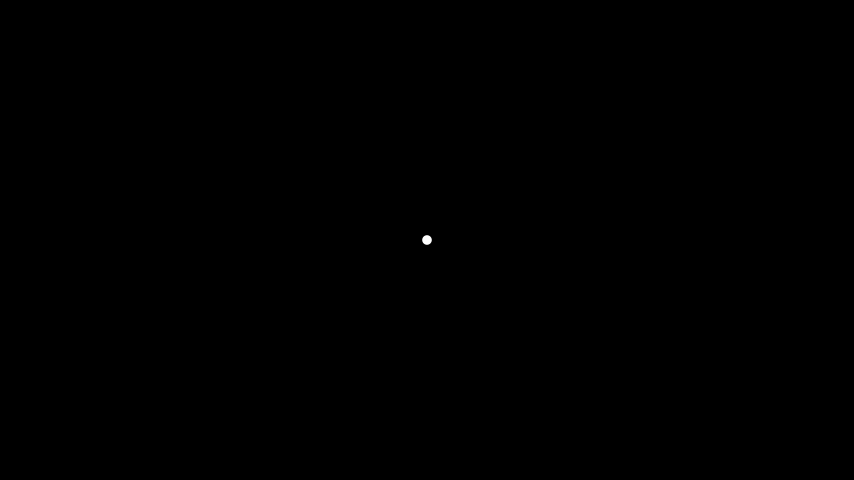

In [3]:
%%manim -ql -vINFO  EscenaConPunto

class EscenaConPunto(Scene):
    
    def construct(self):
        
        self.add(Dot())

Comentemos el código línea a línea.
```
%%manim -ql -vINFO  EscenaConPunto
```
En esta primera linea le decimos a manim que anime una escena llamada `EscenaConPunto`, que este en baja calidad (`-ql` es quality low. Podríamos poner calidad media con `-qm,` alta con `-qh`, o máxima con `-qk`) y que nos suelte información del proceso de animación (`-vINFO`)  

```
class EscenaConPunto(Scene):
```
Aquí definimos la escena que queremos animar: Su nombre (`EscenaConPunto`) y de qué clase de Escena va a heredar los métodos y atributos. En nuestro caso, será la clase `Scene`, la más básica.

```
    def construct(self):
```
Aquí definimos el constructor de la clase `EscenaConPunto`. No entraré en muchos detalles, ya que esto tiene más que ver con Python que con manim, pero dejémoslo en que cualquier cosa que querramos que aparezca en la escena ha de estar dentro del constructor.
```
        self.add(Dot())
```
Ahí lo que se está haciendo es usar el método `add` de la clase `Scene` para añadir un **MObject** en nuestra animación (en este ejemplo, un punto). Como veremos en un futuro ejemplo, si queremos hacer una **animación**, se usará el método `play` de `Scene` 

Lo que quiero recalcar es que **dentro del parentesis de la clase `EscenaConPunto()`, puedes poner muchos tipos de escenas**, en función del tipo de escena que quieras crear.
`Scene` es la más básica de todas, pero hay muchos otros tipos. Por ejemplo:
* `MovingCameraScene`: Escena en la que hay movimientos en la cámara
* `ThreeDScene`: Escena en 3 dimensiones
* `VectorScene`: Escena con vectores (útil por ejemplo si quieres representar un campo eléctrico, un espacio de fases, ...)

Os dejo para terminar esta sección un enlace a la web de Manim para que podáis ver los [tipos de escenas]( https://docs.manim.community/en/stable/reference_index/scenes.html "https://docs.manim.community/en/stable/reference_index/scenes.html") que hay. Ahora vayamos a algo más divertido. Los **MObjects**:

## 3. MObjects

**Los Mobjects (Mathematical Objects) son los objetos que queremos animar**. Serán cosas como un cuadrado, un punto, una flecha, unos ejes, una matriz, ... En general, los objetos de las matemáticas que se usan en física e ingeniería (salvo los conceptos mas abstractos) tienen un Mobject que nos permitirá trabajar con ellos cómodamente.

Es importante entender que **los Mobjects son clases con sus métodos y atributos que se heredan de varias clases**. En la web de manim hay un [arbol con las clases y subclases](https://docs.manim.community/en/stable/reference.html#inheritance-graphs 'https://docs.manim.community/en/stable/reference.html#inheritance-graphs') de todas las escenas, MObjects y animaciones de manim.

A continuación, os voy a enseñar una escena con muchos de estos MObjects para poder explicaros varios conceptos importantes

Manim Community v0.18.1

[01/08/25 14:05:44] INFO                                                                   ]8;id=95264;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=895434;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#737\737]8;;\
                             File ready at                                                                         
                             '/mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/media/im                         
                             ages/manim_ce/EscenaConMuchasCosas_ManimCE_v0.18.1.png'                               
                                                                                                                   

                    INFO     Rendered EscenaConMuchasCosas                                             ]8;id=592332;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=724802;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene.py#247\247]8;;\
                             Played 0 animations                                                                   

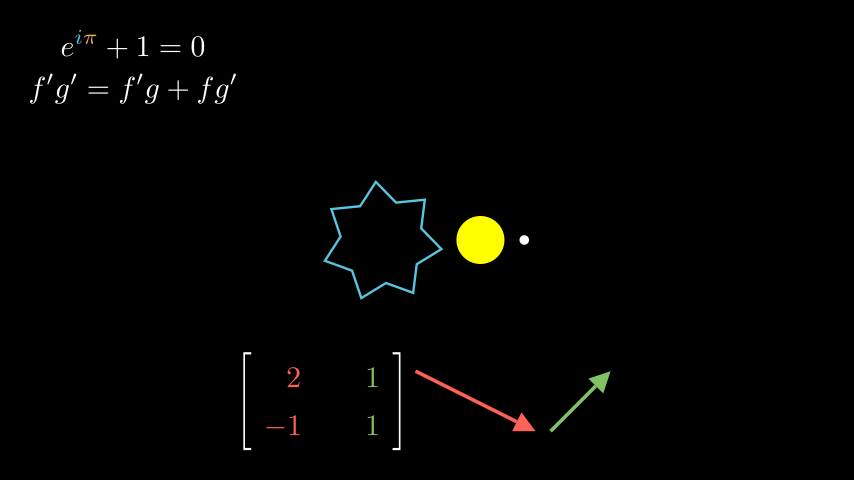

In [4]:
%%manim -ql -vINFO  EscenaConMuchasCosas

class EscenaConMuchasCosas(Scene):
    
    def construct(self):
        
        punto = Dot()
        punto_grande_amarillo = Dot().set_color(YELLOW).scale(5)
        estrella = Star(n=7).set_color(BLUE).rotate(0.1)

        Euler = MathTex(r'e^{i \pi} + 1 = 0', tex_to_color_map={'i': BLUE, '\pi': GOLD})
        Regla_de_la_cadena = MathTex(r" f' g' = f'g +fg' ")

        matriz = Matrix([[2, 1], [-1, 1]]).set_column_colors(RED, GREEN)
        vector_1 = Vector(direction=np.array([2., -1., 0.])).set_color(RED)
        vector_2 = Vector(direction=np.array([1., 1., 0.])).set_color(GREEN)

        Grupo_de_Figuras =  VGroup(punto, punto_grande_amarillo, estrella).arrange(LEFT)
        Grupo_de_formulas = VGroup(Euler, Regla_de_la_cadena).arrange(DOWN).to_corner(UL)
        Grupo_de_algebra =  VGroup(matriz, vector_1, vector_2).arrange(RIGHT).to_edge(DOWN)
        
        self.add(Grupo_de_Figuras)
        self.add(Grupo_de_formulas)
        self.add(Grupo_de_algebra)

Como podéis ver en esta escena ya hay muchas cosas, pero vayamos paso por paso para entender qué hemos hecho arriba
Al inicio definimos unas figuras geométricas en estas líneas:

``` [python]
        punto= Dot()
        punto_grande_amarillo = Dot().set_color(YELLOW).scale(5)
        estrella= Star(n=7).set_color(BLUE).rotate(0.1)
```

Lo primero es un punto igual al que usamos en la escena anterior. Pero despues vemos cómo simplemente usando unos métodos de esa clase, como son `set_color` y `scale`, podemos definir su tamaño y color., creando así despues un punto amarillo más grande. Pero además luego añadimos una estrella, con `Star(n=7)` y hacemos que esta sea de color azul y que esté ligeramente rotada. La forma para aplicar estos efectos es usando los métodos adecuados (`set_color` y `rotate` en nuestro caso).

Después en las siguientes líneas, definimos unas fórmulas matemáticas usando LATEX:

``` [python]
        Euler = MathTex(r'e^{i \pi} + 1 = 0', tex_to_color_map={'i': BLUE, '\pi': GOLD})
        Regla_de_la_cadena = MathTex(r" f' g' = f'g +fg' ")
```

La primera fórmula es la Identidad de Euler. Esa forma de escribir con las llaves y las barras son propias de LATEX, no de manim, por lo que no me centraré en explicarlo. Lo que si que es propio de manim es la forma en la que se pueden separar las partes de dicha ecuacion para asignarles un color, con la variable de la función `tex_to_color_map`. Además, he añadido la ecuación de la Regla de la cadena, para que veáis otro ejemplo menos complejo.

Para terminar, he añadido una matriz y dos vectores:

``` [python]
        matriz = Matrix([[2, 1], [-1, 1]]).set_column_colors(RED, GREEN)
        vector_1=Vector(direction=np.array([2., -1., 0.])).set_color(RED)
        vector_2=Vector(direction=np.array([1., 1., 0.])).set_color(GREEN)
```

Como podéis ver, he representado en la primera línea la matriz 2x2 que vemos en la imagen y uso un método de `Matrix` para asignar unos colores a las columnas (`set_column_colors(RED, GREEN)`) que representan los vectores que pondré después. Luego defino dos vectores con los valores de las columnas de la matriz, el `vector_1` y el `vector_2`. Para que sea más visual qué vector es el que representa cada columna, asigno los colores con `set_color` según le corresponda a cada vector.  

Se podría pensar que con eso ya está todo, pero falta una parte muy importante, y es asignar las posiciones dentro de la escena a cada MObject. Hay muchos métodos para asignar la posición que queramos a cada MObject, pero en este ejemplo he preferido de paso enseñaros cómo agrupar los MObjects en grupos llamados `VGroup`s. Estas son las últimas lineas del código:

``` [python]
        Grupo_de_Figuras =  VGroup(punto, punto_grande_amarillo, estrella).arrange(LEFT)
        Grupo_de_formulas = VGroup(Euler, Regla_de_la_cadena).arrange(DOWN).to_corner(UL)
        Grupo_de_algebra =  VGroup(matriz, vector_1, vector_2).arrange(RIGHT).to_edge(DOWN)
```
Lo que estamos viendo es la definión de los tres grupos que he explicado arriba uno por uno.  
El primer grupo es el de los puntos y la estrella (`Grupo_de_Figuras = VGroup(punto, punto_grande_amarillo, estrella)`). Usando el método `arrange` podemos ordenarlos dentro de una escena, en este caso, hacia la izquierda (`arrange(LEFT)`). La posición que tendrá este grupo en la escena será el centro, ya que es la que da manim a cualquier MObject salvo que se le indique lo contrario.  
Después creamos el grupo de fórmulas `Grupo_de_formulas = VGroup(Euler, Regla_de_la_cadena)`. Hacemos que se agrupen hacia abajo con `arrange(DOWN)` y que se muevan a la esquina superior izquierda con `.to_corner(UL)` (UL es una abreviatura de *Upper Left*).  
Finalmente hacemos un procedimiento análogo con el grupo de la matriz y los vectores `Grupo_de_algebra = VGroup(matriz, vector_1, vector_2)`. Los metodos que usamos serán para que se ordenen hacia la derecha `arrange(RIGHT)` y que el grupo se coloque en el eje inferior, con `to_edge(DOWN)`.  

Al igual que en la anterior escena, le especificamos a manim que añada estos elementos a la escena con `self.add`.

La conclusión que quiero resaltar es que hay **muchos tipos de Mobjects, que se pueden modificar usando sus métodos, y que al agruparlos en `VGroup`s podemos trabajar de una forma mucho más fácil con estos**. Es muy recomendable ir a la [guía de uso de manim]( https://docs.manim.community/en/stable/reference_index/mobjects.html 'https://docs.manim.community/en/stable/reference_index/mobjects.html') para ver los usos todos los MOBjects que hay y sus métodos.

Nos queda la parte mas chula **¡Hacer que los MObjects se muevan con animaciones!**

## 4. Animaciones

Saltemos directamente a ver el código de esta animación

In [3]:
%%manim -qk -vINFO  EscenaConAnimaciones

class EscenaConAnimaciones(Scene):
    def construct(self):

        Texto = Text('Esto es una escena sencilla', t2c={"escena sencilla": YELLOW})
        self.play(Write(Texto))
        self.wait()
        self.play(Texto.animate.to_edge(UL), run_time=1)
        self.wait(3)

        Cuadrado = Square(color=BLUE)
        
        self.play(Create(Cuadrado))
        self.play(Cuadrado.animate.shift(2*LEFT + UP))
        self.play(Cuadrado.animate.scale(0.3))
        self.play(Cuadrado.animate.rotate(0.4))
        self.wait()

        Estrella= Star(n=9, color=RED, fill_opacity=1)
        self.play(Transform(Cuadrado, Estrella))
        self.wait()

Manim Community v0.18.1

[01/08/25 14:44:01] INFO     Animation 0 : Partial movie file written in                   ]8;id=695926;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=148936;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/media/vi                         
                             deos/manim_ce/2160p60/partial_movie_files/EscenaConAnimacione                         
                             s/1457378895_4121323697_223132457.mp4'                                                

[01/08/25 14:44:06] INFO     Animation 1 : Partial movie file written in                   ]8;id=326994;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=817946;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/media/vi                         
                             deos/manim_ce/2160p60/partial_movie_files/EscenaConAnimacione                         
                             s/1993220219_1704852926_4050084889.mp4'                                               

[01/08/25 14:44:15] INFO     Animation 2 : Partial movie file written in                   ]8;id=554395;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=471188;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/media/vi                         
                             deos/manim_ce/2160p60/partial_movie_files/EscenaConAnimacione                         
                             s/1993220219_3180806503_2259761173.mp4'                                               

[01/08/25 14:44:31] INFO     Animation 3 : Partial movie file written in                   ]8;id=206340;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=425162;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/media/vi                         
                             deos/manim_ce/2160p60/partial_movie_files/EscenaConAnimacione                         
                             s/1993220219_3891874688_4180375817.mp4'                                               

[01/08/25 14:44:38] INFO     Animation 4 : Partial movie file written in                   ]8;id=424454;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=155212;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/media/vi                         
                             deos/manim_ce/2160p60/partial_movie_files/EscenaConAnimacione                         
                             s/1993220219_107525316_2324206674.mp4'                                                

[01/08/25 14:44:45] INFO     Animation 5 : Partial movie file written in                   ]8;id=82747;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=132973;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/media/vi                         
                             deos/manim_ce/2160p60/partial_movie_files/EscenaConAnimacione                         
                             s/1993220219_3825365216_2742137704.mp4'                                               

[01/08/25 14:44:52] INFO     Animation 6 : Partial movie file written in                   ]8;id=592319;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=507384;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/media/vi                         
                             deos/manim_ce/2160p60/partial_movie_files/EscenaConAnimacione                         
                             s/1993220219_4158570671_2742137704.mp4'                                               

[01/08/25 14:44:59] INFO     Animation 7 : Partial movie file written in                   ]8;id=411691;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=511579;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/media/vi                         
                             deos/manim_ce/2160p60/partial_movie_files/EscenaConAnimacione                         
                             s/1993220219_4094872914_2742137704.mp4'                                               

[01/08/25 14:45:04] INFO     Animation 8 : Partial movie file written in                   ]8;id=43839;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=380253;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/media/vi                         
                             deos/manim_ce/2160p60/partial_movie_files/EscenaConAnimacione                         
                             s/1993220219_1733944848_1368034629.mp4'                                               

[01/08/25 14:45:12] INFO     Animation 9 : Partial movie file written in                   ]8;id=530008;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=495243;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/media/vi                         
                             deos/manim_ce/2160p60/partial_movie_files/EscenaConAnimacione                         
                             s/1993220219_1931842622_3835078996.mp4'                                               

[01/08/25 14:45:17] INFO     Animation 10 : Partial movie file written in                  ]8;id=35981;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=293237;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#527\527]8;;\
                             '/mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/media/vi                         
                             deos/manim_ce/2160p60/partial_movie_files/EscenaConAnimacione                         
                             s/1993220219_1733944848_2914464281.mp4'                                               

                    INFO     Combining to Movie file.                                      ]8;id=762279;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=227859;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#617\617]8;;\

[01/08/25 14:45:18] INFO                                                                   ]8;id=200047;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py\scene_file_writer.py]8;;\:]8;id=356049;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene_file_writer.py#737\737]8;;\
                             File ready at                                                                         
                             '/mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/media/vi                         
                             deos/manim_ce/2160p60/EscenaConAnimaciones.mp4'                                       
                                                                                                                   

                    INFO     Rendered EscenaConAnimaciones                                             ]8;id=489361;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene.py\scene.py]8;;\:]8;id=856577;file:///mnt/netapp1/Store_CESGA/home/cesga/fyanez/manim_ce/manim_env/lib/python3.10/site-packages/manim/scene/scene.py#247\247]8;;\
                             Played 11 animations                                                                  

Como véis, en pocas líneas, se pueden conseguir resultados muy visuales. Vayamos paso a paso comentando las novedades que hemos añadido para poder crear esta animación:
```
        Texto = Text('Esto es una escena sencilla', t2c={"escena sencilla": YELLOW})
        self.play(Write(Texto))
        self.wait()
        self.play(Texto.animate.to_edge(UL), run_time=1)
        self.wait(3)
```
Lo primero que ponemos es la parte que se refiere a crear el texto, `Text('Esto es una escena sencilla')`. Empleando el parámetro `t2c={"escena sencilla": YELLOW}` podemos cambiar el color de la parte del texto que elijamos, en nuestro ejemplo, solo queremos resaltar *escena sencilla*.

Ahora, lo que es muy cómodo es la facilidad con la que se anima la escritura del texto. Solo empleando la **animación** `Write` podemos hacer que cualquier texto, sea `Text, Tex, MathTex`, se escriba solo automáticamente con una animación muy vistosa. Para que se ejecute una animación en la escena, es necesario que se haga con el método `self.play`.  
Después de que se escriba, hacemos que la escena espere dos segundos con el método `self.wait()`. Si le indicamos un número dentro, podremos hacer que espere una cantidad distinta de dos segundos, con `self.wait(3)` para que espere tres segundos, o el tiempo se necesite.  
Luego, vemos como tras esperar, usando el método `animate` en el MObject que queramos, podemos animar cosas como traslaciones. En este caso, animamos que el texto se mueva al eje superior izquierdo con `Texto.animate.to_edge(UL)`. Además, podemos controlar el tiempo que tarda en hacerse dicha animación con el parámetro `run_time=1`. En este caso, se hará en un segundo, pero podemos ponerle el valor que queramos. Por defecto, las animaciones se ejecutan en dos segundos.  
Antes de pasar a la siguiente sección, esperamos tres segundos con `self.wait(3)`.
```
        Cuadrado = Square(color=BLUE)
        
        self.play(Create(Cuadrado))
        self.play(Cuadrado.animate.shift(2*LEFT+ UP))
        self.play(Cuadrado.animate.scale(0.3))
        self.play(Cuadrado.animate.rotate(0.4))
        self.wait()
```
En esta parte, vamos a animar una serie de acciones sobre un cuadrado. Definimos este como un cuadrado con el borde azul con `Square(color=BLUE)`
Luego con `self.play` creamos el cuadrado con la animación `Create`, y ejecutamos en cadena todas las animaciones con métodos del objeto cuadrado empleando el método `animate`. Estas son un movimiento dos unidades hacia la derecha y una hacia arriba (`shift(2*LEFT+ UP)`). Luego, reducimos el tamaño de cuadrado y lo rotamos un poco con `scale(0.3)` y con `rotate(0.4)`. Finalmente, esperamos dos segundos antes de ir a la última parte de la animación.
```
        Estrella= Star(n=9, color=RED, fill_opacity=1)
        self.play(Transform(Cuadrado, Estrella))
        self.wait()
````
Para acabar, vamos a animar como el cuadrado se transforma en una estrella de nueve puntas roja. Creamos esta estrella con `Star(n=9, color=RED, fill_opacity=1)`. Y la transformación, es tan sencillo como darle a la animación `Transform` el objeto a transformar y en cuál quieres que se convierta. En nuestro ejemplo, que el cuadrado se transforme en la estrella (`Transform(Cuadrado, Estrella)`). 

Os dejo aquí todas las [animaciones](https://docs.manim.community/en/stable/reference_index/animations.html 'https://docs.manim.community/en/stable/reference_index/animations.html') que existen en manim

## 5. Detalles finales

Como habéis visto, esta librería pone nuestra disposición una cantidad de herramientas que hace que podamos aniamr práctimente cualquier concepto matemático que se nos pase por la cabeza. Pero antes de irme, dejaré aqui anotado a modo de cajón de sastre varias cosas que, por no quitaros mas tiempo del necesario, no he profundizado con el tiempo que merece:

### 5.1 ManimCE vs ManimGL

Es muy importante que tengáis en cuenta que actualmente **hay dos paquetes diferentes que se llaman *MANIM***. Uno es del que hemos estado hablando, que es **Manim Community Edition**, que tiene una documentación muy detallada y es el que está mas estructurado. Por otro lado existe la version que usa Grant Sanderson, el creador de Manim para hacer sus animaciones y videos: **Manim GL**. Este paquete tiene más funcionalidades, pero carece de una documentación tan clara y buena como la que tiene la edición de la comunidad.  
Yo prefiero usar la edición de la comunidad por accesibilidad, porque está muy bien documentada y es más facil de debbugear. Además, las aportaciones que se hace a la edición ManimGL, suelen añadirse con el tiempo a la edición de la comunidad. Pero es importante saber esto cuando buscas información de manim por internet.

### 5.2 Cosas importantes que no he mencionado

Por brevedad, solo he tratado los tres temas clave para poder hacer animaciones básicas en manim. Pero hay muchas otras cosas de las que se puede aprender más para usar manim en todo su potencial. Dejo aquí anotados estos conceptos para que los exploréis si vuestros proyectos requieren usarlos:
* Los updaters: Los updater son funciones de Python que se aplican en cada escena. Son super potentes para poder hacer que un cierto conjunto de acciones (rotar un objeto, trazar una trayectoria, ...) se aplique de forma seguida y elegante. Hay que añadirlos a los MObjects con el método `MObject.add_updater(<función que quieras>)`. Os dejo un [tutorial en el que explican como usarlos](https://www.youtube.com/watch?v=3Duf3g_Wkqs&ab_channel=Varniex 'https://www.youtube.com/watch?v=3Duf3g_Wkqs&ab_channel=Varniex') con un ejemplo muy bonito.  
* La cámara: La camará es un objeto tammbién en manim al que le puedes aplicar una serie de métodos para jugar con ella (moverla, rotarla, acercarla, ...). Además, dependiendo del tipo de escena que uses, es fundamental tenerla en cuenta para obtener buenos resultados, como en las escenas en tres dimensiones. Os dejo la referencia a la camara del API [aquí.](https://docs.manim.community/en/stable/reference_index/cameras.html 'https://docs.manim.community/en/stable/reference_index/cameras.html').  
* Plugins: Manim tiene una serie de plugins muy útiles que pueden ampliar todavía mas las cosas que se pueden hacer con manim. En este mismo entorno, he instalado un plugin que es `manim-slides`, con el que podéis convertir los videos en presentaciones que usar en conferencias o clases. Os animo a probarlo y os dejo la documentación [aquí](https://manim-slides.eertmans.be/latest/ 'https://manim-slides.eertmans.be/latest/'). También podéis bucear por internet y buscar otros plugins para manim.

### 5.3 ¿Dónde puedo encontrar los vídeos que he animado?

Los vídeos que hagáis se guardarán automáticamente en `$STORE/manim_ce/media`. En esa carpeta está toda la información que vayáis generando con manim, desde las fórmulas que escribáis hasta las imágenes que generéis, pero los videos en sí estarán en `$STORE/manim_ce/media/videos/manim_ce/<la resuloción que hayáis escogido>`. Ahí tendreís los vídeos en formato `.mp4` y las animaciones divididas una a por una en la carpeta `partial_movie_files`. Muy útil si queréis concatenarlas una a una manualmente en un PowerPoint o si solo os interesa ver una de las partes de vuestras animaciones

### 5.4 Consejos finales

Aunque os haya puesto ahora ejemplos muy sencillos para introduciros a la librería, sería deshonesto decir que manim, como cualquier cosa en este mundo, no tiene una curva de aprendizaje que se puede empinar bastante en ocasiones. Por ello, voy a dejaros una serie de consejos y conceptos que he aprendido tras algo más de un año usando frecuentemente esta librería:
1. [**MIRAR LA DOCUMENTACIÓN DE MANIM**](https://docs.manim.community/en/stable/index.html, 'https://docs.manim.community/en/stable/index.html'): Este consejo es sin duda el más importante. No paréis de navegar y empaparos de la documentación y ejemplos que esta librería ofrece. Os la he dejado por muchos sitios en este notebook, pero no puedo insistir lo suficiente en lo importante que es conocer bien los métodos y propiedades de esta librería. Os vuelvo a dejar [aquí](https://docs.manim.community/en/stable/index.html, 'https://docs.manim.community/en/stable/index.html') una vez mas la documentación por si no la hubieseis visto aún.
2. Siempre que manim tenga un método para agilizar una función que hayas hecho tu, úsalo. Y si un concepto es fácil de entender (mover algo, seleccionar el primer o último elemento de un conjunto, aplicar una trasnformación sencilla a un objeto, ...), lo mas probable es que manim tenga un método para automatizarlo. Úsalo.
3. ChatGPT sabe programar en Manim decentemente. No hace todos los ejemplos perfectos, de vez en cuando se inventa los métodos y no es la primera vez que he visto que directamente se inventa las animaciones o los MObjects; pero a grandes rasgos sabe hacer correctamente las estructuras de los códigos y hacer cosas básicas como las que hicimos en este notebook. Recomiendo que probéis a ver cómo hace ChatGPT las ideas que le déis en manim, sobre todo si son sencillas y/o sabéis detallarselas bien.
4. Evita mezclar listas y otro tipos de grupos al usar manim, y emplea `VGroup` en su lugar. Ofrece muchas ventajas al usar sus métodos y tiene exactamente la misma notación que los arrays de numpy.
5. Crea tus propias funciones en Python o objetos para agilizar animaciones y proyectos más avanzados.
6. **Cuanta más experiencia tengas programando en Python, mejor**. A veces, los problemas o limitaciones que tiene manim, salen de no saber traduccir el problema a lenguaje Python de forma sencilla, por eso recomendé al principio manejar bien Python.
7. **MIRA LA DOCUMENTACIÓN**